<a href="https://colab.research.google.com/github/Gunasekaran-143/FakeNewsDetection/blob/main/Second_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
import pandas as pd

true = pd.read_csv('/True.csv')
fake = pd.read_csv('/Fake.csv')
true.head(3)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [ ]:
fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [ ]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
true['label'] = 1
fake['label'] = 0

In [ ]:
# Combine the sub-datasets in one.
frames = [true.loc[:5000][:], fake.loc[:5000][:]]
df = pd.concat(frames)
df.tail()

,title,text,subject,date,label
4996,Justice Department Announces It Will No Longe...,Republicans are about to lose a huge source of...,News,"August 18, 2016",0
4997,WATCH: S.E. Cupp Destroys Trump Adviser’s ‘Fa...,A pawn working for Donald Trump claimed that w...,News,"August 18, 2016",0
4998,WATCH: Fox Hosts Claim Hillary Has Brain Dama...,Fox News is desperate to sabotage Hillary Clin...,News,"August 18, 2016",0
4999,CNN Panelist LAUGHS In Corey Lewandowski’s Fa...,As Donald Trump s campaign continues to sink d...,News,"August 18, 2016",0
5000,Trump Supporter Who Wants To Shoot Black Kids...,"Hi folks, John Harper here, at least if you as...",News,"August 18, 2016",0


In [ ]:
df.shape

(10002, 5)

In [ ]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
df.describe()

,label
count,10002.000000
mean,0.500000
std,0.500025
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
X = df.drop('label', axis=1)
y = df['label']
# Delete missing data
df = df.dropna()
# Convert all columns to numeric type
df_numeric = df.apply(pd.to_numeric, errors='coerce')
# Create histograms for each column in Plotly Express
fig = px.histogram(df_numeric, nbins=10, width=1000, height=500,color_discrete_sequence=['purple'])
# Set layout properties
fig.update_layout(
    title='Histograms for Each Column',
)
fig.show()
df2 = df.copy()
df2.reset_index(inplace=True)

# Imbalanced Datasets:
# If your dataset is imbalanced (i.e., one class is significantly more frequent than the other), achieving high accuracy might be less informative.
# Make sure to check the distribution of your classes in the dataset.

In [ ]:
df2['title'][2]

"Senior U.S. Republican senator: 'Let Mr. Mueller do his job'"

In [ ]:
# How many articles per subject?
# Assuming df2 is your DataFrame
fig = px.bar(df2.groupby(['subject'])['text'].count().reset_index(), x='subject', y='text',
             title='Number of Articles per Subject',
             labels={'text': 'Number of Articles', 'subject': 'Subject'},
             hover_data={'text': ':,d'},
             color_discrete_sequence=['purple'])
fig.show()


In [ ]:
# How many fake and real articles?
import plotly.graph_objects as go
import pandas as pd

# Assuming df2 is your DataFrame
label_counts = df2.groupby(['label'])['text'].count().reset_index()

# Create an interactive bar plot with plotly.graph_objects
fig = go.Figure()

fig.add_trace(go.Bar(
    x=label_counts['label'],
    y=label_counts['text'],
    hovertext=label_counts['text'],  # Text to display on hover
    marker_color='purple',  # Set color to purple
))

# Set layout properties
fig.update_layout(
    title='Number of Articles per Label',
    xaxis=dict(title='Label'),
    yaxis=dict(title='Number of Articles'),
    hovermode='x',  # Display hover info for nearest point on x-axis
)

# Show the plot
fig.show()


In [ ]:
#pip install nltk
#data preprocessing
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Assuming df is your DataFrame with columns 'text' and 'label'
porter_stemmer = PorterStemmer()
stop = set(stopwords.words('english'))

# Tokenization, stemming, and removing stopwords
df2['text'] = df2['text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split() if word.lower() not in stop]))

# Feature extraction using TF-IDF
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X = tfidf_v.fit_transform(df['text']).toarray()
y = df2['label']



In [ ]:
def grid_search(model, param_grid, X, y):
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)

    print(f"Best Parameters for {type(model).__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, roc_curve, auc, precision_recall_curve
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from texttable import Texttable
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def train_evaluate_model(model, param_grid, model_name, X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Generate ROC curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Generate Precision-Recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Evaluation Metrics Table
    table = Texttable()
    table.set_cols_align(["c", "c"])
    table.header(["Metric", "Value"])
    table.add_row(["Accuracy", f"{accuracy:.2%}"])
    table.add_row(["Precision", f"{precision:.2%}"])
    table.add_row(["Recall", f"{recall:.2%}"])
    table.add_row(["F1 Score", f"{f1:.2%}"])
    table.set_cols_width([15, 15])
    table.set_chars(['-', '|', '+', '-'])
    axes[0, 0].text(0.5, 0.5, table.draw(), fontsize=12, ha='center', va='center', fontname='monospace')
    axes[0, 0].axis('off')
    axes[0, 0].set_title(f'Evaluation Metrics Table for {model_name}')

    # Confusion Matrix
    # Confusion Matrix
    custom_cmap = sns.light_palette("purple", as_cmap=True)
    heatmap = sns.heatmap(cm, fmt='d', cmap=custom_cmap, cbar=False, ax=axes[0, 1], linewidths=1)
    axes[0, 1].set_title(f'Confusion Matrix for {model_name}')

    # Add labels to the cells
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            text = f'{cm[i, j]}\n'
            #axes[0, 1].text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=12)

    # Additional labels for TP, FP, TN, FN
    axes[0, 1].text(0.5, 0.5, f'TN={cm[0, 0]}', ha='center', va='center', color='white', fontsize=12)
    axes[0, 1].text(0.5, 1.5, f'FN={cm[1, 0]}', ha='center', va='center', color='black', fontsize=12)
    axes[0, 1].text(1.5, 0.5, f'FP={cm[0, 1]}', ha='center', va='center', color='black', fontsize=12)
    axes[0, 1].text(1.5, 1.5, f'TP={cm[1, 1]}', ha='center', va='center', color='white', fontsize=12)


    # ROC Curve
    axes[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1, 0].set_xlim([0.0, 1.0])
    axes[1, 0].set_ylim([0.0, 1.05])
    axes[1, 0].set_xlabel('False Positive Rate')
    axes[1, 0].set_ylabel('True Positive Rate')
    axes[1, 0].set_title(f'ROC Curve for {model_name}')
    axes[1, 0].legend(loc="lower right")

    # Precision-Recall Curve
    axes[1, 1].plot(recall_curve, precision_curve, color='blue', lw=2, label='Precision-Recall curve')
    axes[1, 1].set_xlim([0.0, 1.0])
    axes[1, 1].set_ylim([0.0, 1.05])
    axes[1, 1].set_xlabel('Recall')
    axes[1, 1].set_ylabel('Precision')
    axes[1, 1].set_title(f'Precision-Recall Curve for {model_name}')
    axes[1, 1].legend(loc="lower left")

    # Adjust layout
    plt.tight_layout()
    plt.show()


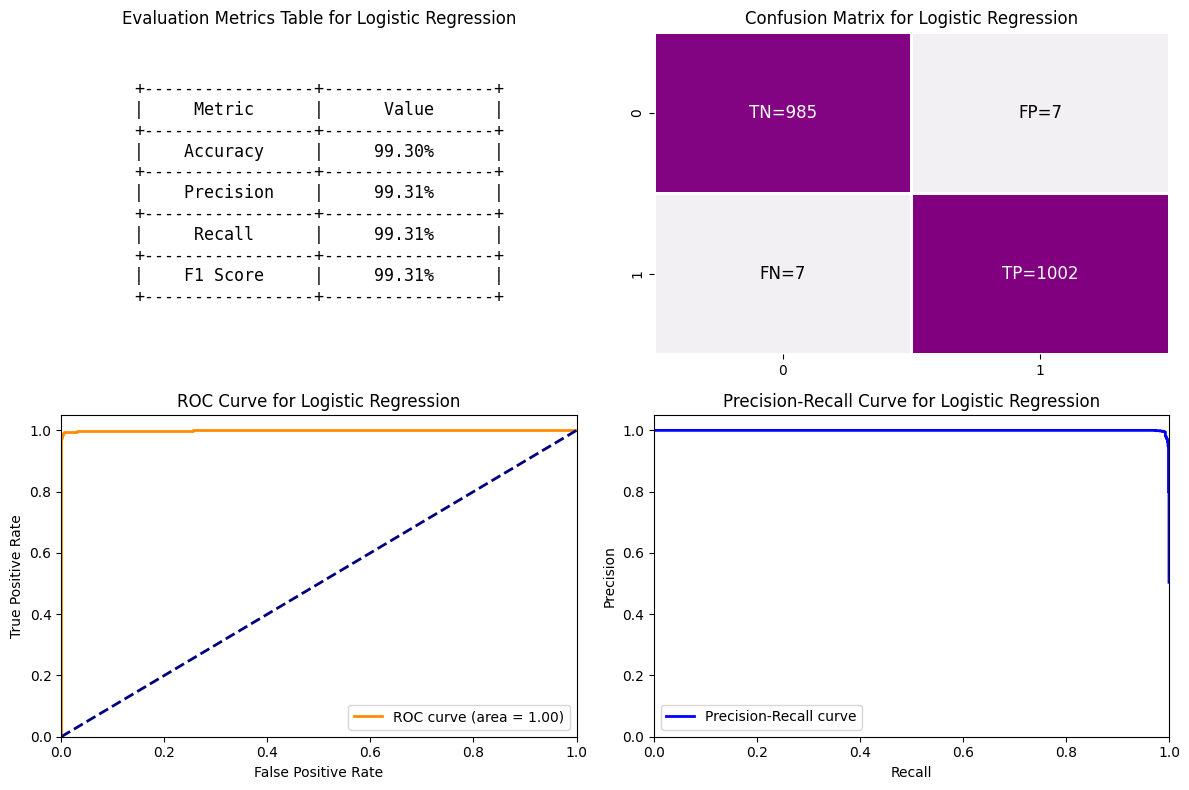

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)

# Define the parameter grids for hyperparameter tunin
lr_param_grid = {'C': [0.1, 1.0, 10.0]}
train_evaluate_model(lr_model, lr_param_grid, 'Logistic Regression', X, y)


Best Parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 100}


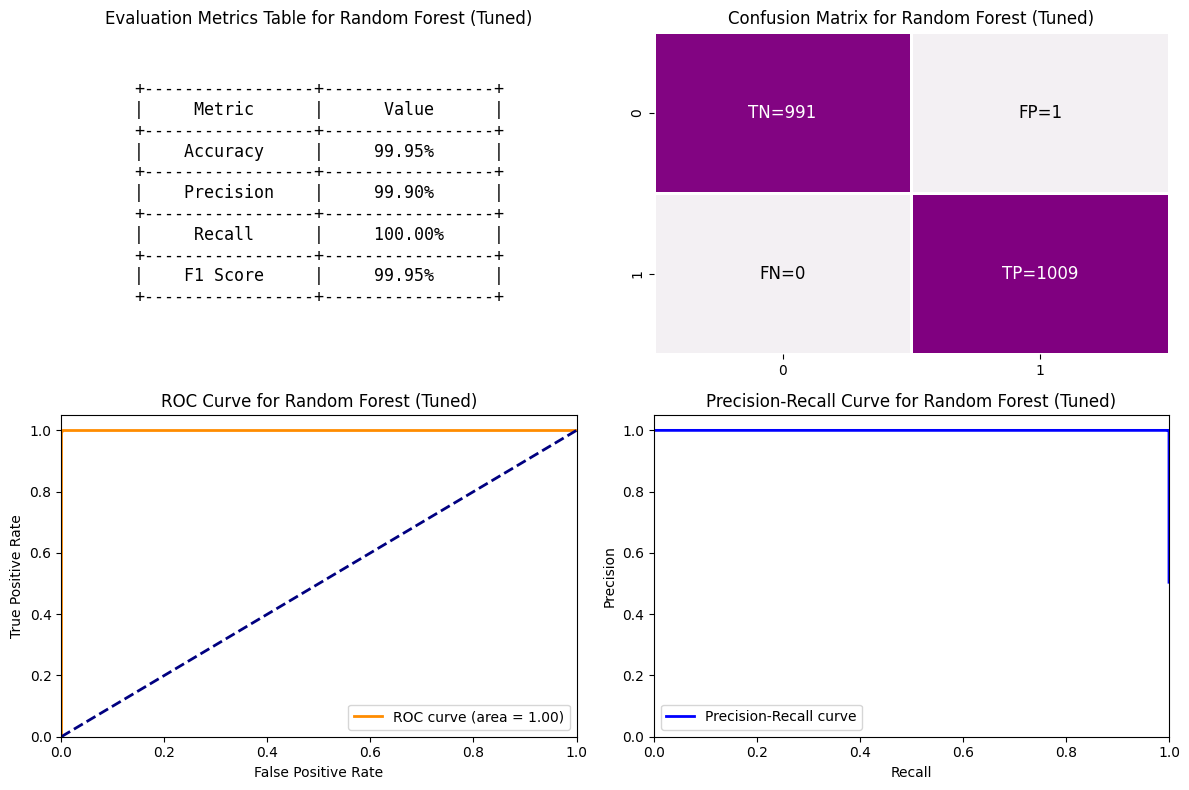

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
best_rf_model = grid_search(rf_model, rf_param_grid, X, y)
#train_evaluate_model(rf_model, rf_param_grid, 'Random Forest', X, y)
train_evaluate_model(best_rf_model, {}, 'Random Forest (Tuned)', X, y)

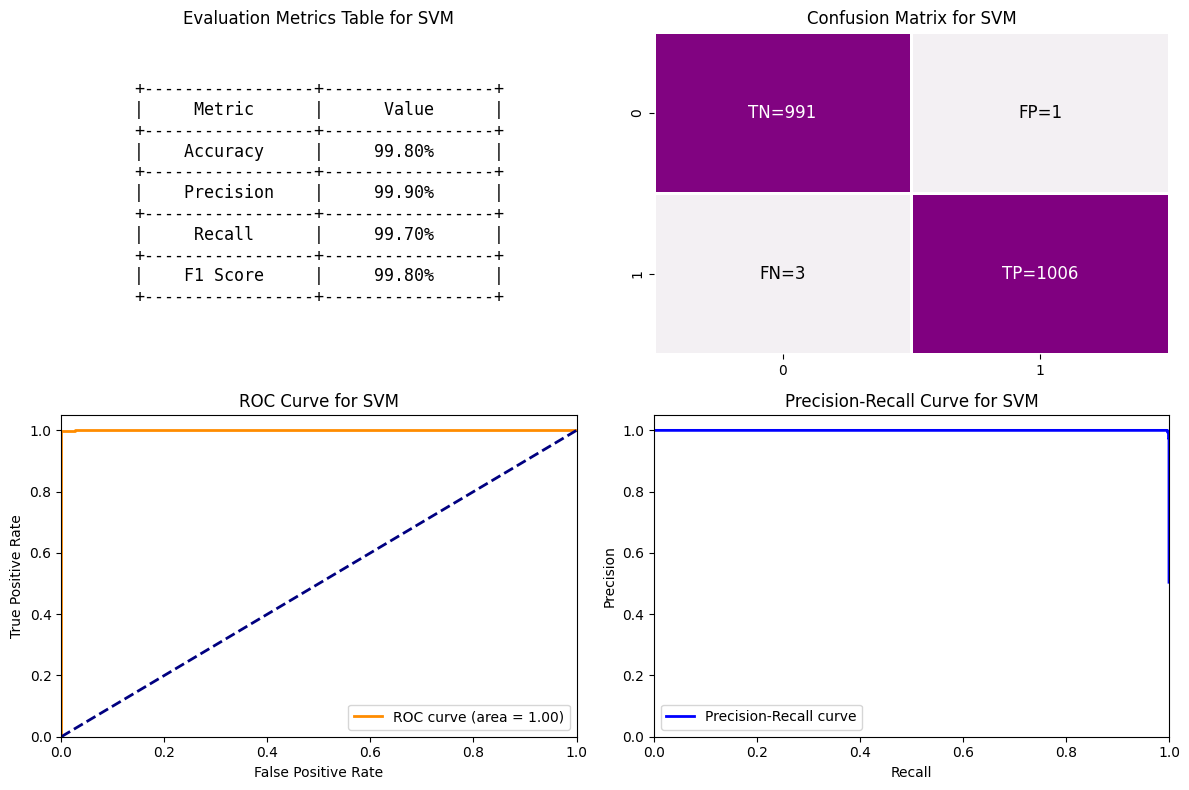

In [ ]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_param_grid = {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}
train_evaluate_model(svm_model, svm_param_grid, 'SVM',X,y)


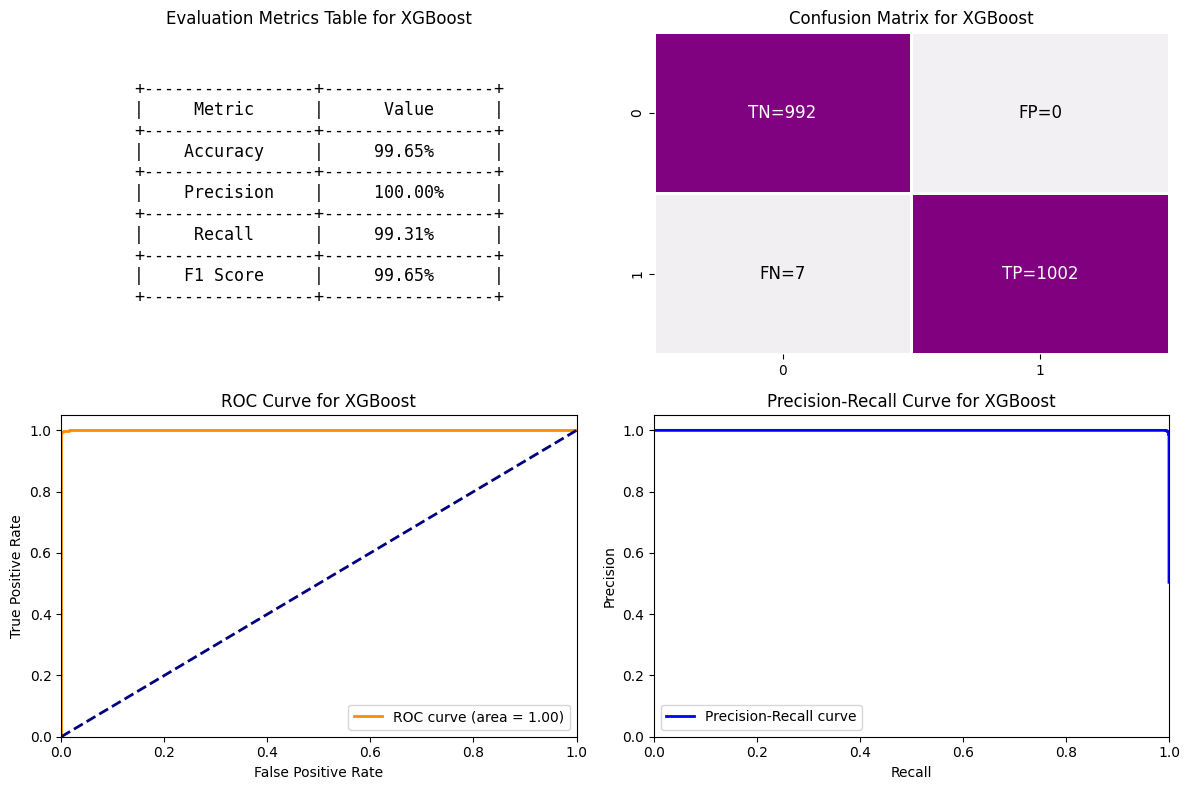

In [ ]:
# gradient boost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Define XGBoost model
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

# Define parameter grid for hyperparameter tuning
xgb_param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

# Train and evaluate XGBoost model
train_evaluate_model(xgb_model, xgb_param_grid, 'XGBoost', X, y)


In [ ]:
import pandas as pd
from tabulate import tabulate
metrics_values = calculate_metrics()
df_metrics = pd.DataFrame(metrics_values, columns=["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])
df_metrics = df_metrics.round(4)
df_metrics["Model"] = ["SVM", "XGBoost", "Logistic Regression", "Random Forest"]
df_metrics = df_metrics[["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]]
table = tabulate(df_metrics, headers='keys', tablefmt='pretty', showindex=False)
print(table)

NameError: name 'calculate_metrics' is not defined


Ensemble Model Metrics:
Accuracy: Mean accuracy: 1.00, Std Dev: 0.00


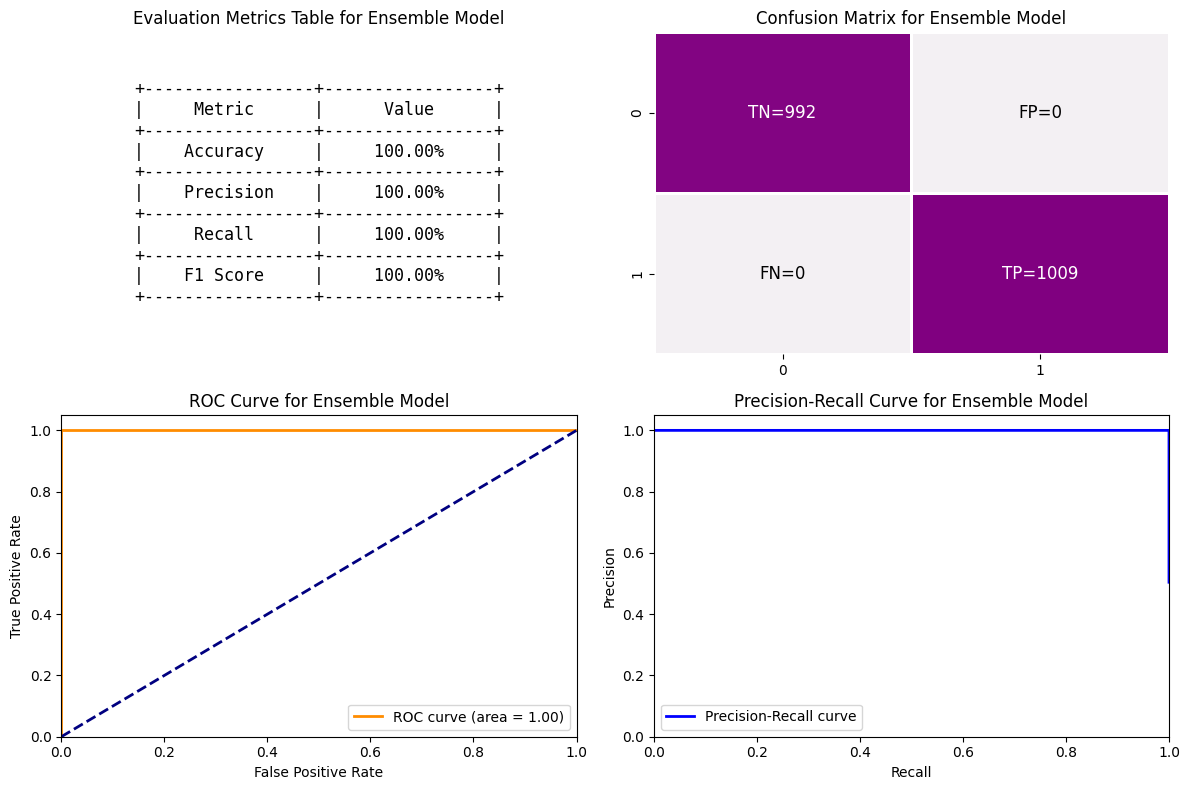

In [ ]:
# The ensemble model is constructed using a soft voting scheme, which means
# it predicts the class label based on the argmax of the sums of the predicted probabilities.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Assuming you have feature matrix X and labels y

# Define base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Create an ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('lr', lr_model)
], voting='soft')  # Use 'hard' for majority voting

# Define evaluation metrics
metrics = ['accuracy'] #, 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate each base model separately
# for name, model in [('Random Forest', rf_model), ('Gradient Boosting', gb_model), ('Logistic Regression', lr_model)]:
#     print(f'\n{name} Metrics:')
#     for metric in metrics:
#         scores = cross_val_score(model, X, y, cv=5, scoring=metric)
#         print(f'{metric.capitalize()}: Mean {metric}: {scores.mean():.2f}, Std Dev: {scores.std():.2f}')

# Evaluate the ensemble model
print('\nEnsemble Model Metrics:')
for metric in metrics:
    ensemble_scores = cross_val_score(ensemble_model, X, y, cv=5, scoring=metric)
    print(f'{metric.capitalize()}: Mean {metric}: {ensemble_scores.mean():.2f}, Std Dev: {ensemble_scores.std():.2f}')

# Define the parameter grids for hyperparameter tuning
ensemble_param_grid = {'rf__n_estimators': [50, 100, 150], 'gb__n_estimators': [50, 100, 150], 'lr__C': [0.1, 1.0, 10.0]}
train_evaluate_model(ensemble_model, ensemble_param_grid, 'Ensemble Model', X, y)

In [46]:
import pickle
# Save the trained ensemble model and TF-IDF vectorizer
with open('/content/ensemble_model.pkl', 'wb') as model_file:
    pickle.dump(ensemble_model, model_file)

with open('/content/tfidfvect_ensemble.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_v, vectorizer_file)


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]

# Define the interactive threshold slider
threshold_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Threshold')

# Define the function to update the plot based on the selected threshold
def update_plot(threshold):
    # Adjust predictions based on the threshold
    y_pred_adjusted = (y_pred_proba > threshold).astype(int)

    # Evaluate the model with the adjusted threshold
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)

    print(f'\033[94mThreshold: {threshold:.2f} | Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}\033[0m')

    # Visualize the Precision-Recall curve with different thresholds using Plotly
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)

    fig = px.line(x=recall_curve, y=precision_curve, labels={'x': 'Recall', 'y': 'Precision'},
                  title='Interactive Precision-Recall Curve', range_x=[0, 1], range_y=[0, 1])

    # Add vertical line for the selected recall and horizontal line for the selected precision
    fig.add_shape(dict(type='line', x0=recall, x1=recall, y0=0, y1=precision,
                       line=dict(color='red', width=2, dash='dash')))
    fig.add_shape(dict(type='line', x0=0, x1=recall, y0=precision, y1=precision,
                       line=dict(color='green', width=2, dash='dash')))

    # Highlight the current threshold on the plot
    fig.add_trace(go.Scatter(x=[recall], y=[precision],
                             mode='markers',
                             marker=dict(color='red', size=8, symbol='circle'),
                             name=f'Selected Threshold: {threshold:.2f}'))

    # Style the plot layout
    fig.update_layout(title=dict(text='Interactive Precision-Recall Curve', x=0.5),
                      xaxis=dict(title='Recall', range=[0, 1]),
                      yaxis=dict(title='Precision', range=[0, 1]),
                      legend=dict(x=0.7, y=1, traceorder='normal'),
                      showlegend=True,
                      hovermode='closest',
                      template='seaborn')

    # Add informative annotations
    fig.add_annotation(x=0.5, y=0.9,
                       text=f'Threshold: {threshold:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}',
                       showarrow=False,
                       font=dict(size=12, color='black'))

    fig.show()

# Display the interactive widgets
widgets.interactive(update_plot, threshold=threshold_slider)

# import plotly.graph_objects as go
# import plotly.express as px
# import ipywidgets as widgets
# from IPython.display import display
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # Train the Random Forest model
# rf_model = RandomForestClassifier()
# rf_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# # Define the interactive threshold slider
# threshold_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Threshold')

# # Define the function to update the plot based on the selected threshold
# def update_plot(threshold):
#     # Adjust predictions based on the threshold
#     y_pred_adjusted = (y_pred_proba > threshold).astype(int)

#     # Evaluate the model with the adjusted threshold
#     precision = precision_score(y_test, y_pred_adjusted)
#     recall = recall_score(y_test, y_pred_adjusted)
#     f1 = f1_score(y_test, y_pred_adjusted)

#     print(f'\033[94mThreshold: {threshold:.2f} | Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}\033[0m')

#     # Visualize the Precision-Recall curve with different thresholds using Plotly
#     precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)

#     fig = px.line(x=recall_curve, y=precision_curve, labels={'x': 'Recall', 'y': 'Precision'},
#                   title='Interactive Precision-Recall Curve', range_x=[0, 1], range_y=[0, 1])

#     # Add vertical line for the selected recall and horizontal line for the selected precision
#     fig.add_shape(dict(type='line', x0=recall, x1=recall, y0=0, y1=precision,
#                        line=dict(color='red', width=2, dash='dash')))
#     fig.add_shape(dict(type='line', x0=0, x1=recall, y0=precision, y1=precision,
#                        line=dict(color='green', width=2, dash='dash')))

#     # Highlight the current threshold on the plot
#     fig.add_trace(go.Scatter(x=[recall], y=[precision],
#                              mode='markers',
#                              marker=dict(color='red', size=8, symbol='circle'),
#                              name=f'Selected Threshold: {threshold:.2f}'))

#     # Style the plot layout
#     fig.update_layout(title=dict(text='Interactive Precision-Recall Curve', x=0.5),
#                       xaxis=dict(title='Recall', range=[0, 1]),
#                       yaxis=dict(title='Precision', range=[0, 1]),
#                       legend=dict(x=0.7, y=1, traceorder='normal'),
#                       showlegend=True,
#                       hovermode='closest',
#                       template='seaborn')

#     # Add informative annotations
#     fig.add_annotation(x=0.5, y=0.9,
#                        text=f'Threshold: {threshold:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}',
#                        showarrow=False,
#                        font=dict(size=12, color='black'))

#     fig.show()

# # Display the interactive widgets
# widgets.interactive(update_plot, threshold=threshold_slider)


interactive(children=(FloatSlider(value=0.5, description='Threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [ ]:
# code includes feature selection, oversampling using SMOTE, and retraining the model on the resampled and selected features.
# These techniques aim to address issues related to imbalanced datasets and feature relevance.

# Import necessary libraries

# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

# Feature Selection using Logistic Regression feature importances
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

sfm = SelectFromModel(lr_model, threshold='median')
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Use SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Retrain the Logistic Regression model with resampled and selected features
lr_model_resampled = LogisticRegression(random_state=42)
lr_model_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_proba_resampled = lr_model_resampled.predict_proba(X_test_selected)[:, 1]

# Adjust the threshold
threshold_resampled = 0.4  # Experiment with different threshold values
y_pred_adjusted_resampled = (y_pred_proba_resampled > threshold_resampled).astype(int)

# Evaluate the model with adjusted threshold
precision_resampled = precision_score(y_test, y_pred_adjusted_resampled)
recall_resampled = recall_score(y_test, y_pred_adjusted_resampled)
f1_resampled = f1_score(y_test, y_pred_adjusted_resampled)

print(f'Resampled Precision: {precision_resampled:.2f}, Resampled Recall: {recall_resampled:.2f}, Resampled F1 Score: {f1_resampled:.2f}')

# Visualize the Precision-Recall curve with different thresholds for the resampled model using Plotly
precision_curve_resampled, recall_curve_resampled, _ = precision_recall_curve(y_test, y_pred_proba_resampled)

fig = make_subplots(rows=1, cols=1, subplot_titles=["Resampled Precision-Recall Curve"])

fig.add_trace(go.Scatter(x=recall_curve_resampled, y=precision_curve_resampled,
                         mode='lines', name='Resampled Precision-Recall curve', line=dict(color='purple', width=2)),
              row=1, col=1)

fig.update_xaxes(title_text='Recall', row=1, col=1)
fig.update_yaxes(title_text='Precision', row=1, col=1)

fig.update_layout(title='Interactive Resampled Precision-Recall Curve',
                  showlegend=True,
                  height=500)

# fig.show()

# from imblearn.over_sampling import SMOTE
# from sklearn.feature_selection import SelectFromModel
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# # Feature Selection using Random Forest feature importances
# sfm = SelectFromModel(rf_model, threshold='median')
# sfm.fit(X_train, y_train)
# X_train_selected = sfm.transform(X_train)
# X_test_selected = sfm.transform(X_test)

# # Use SMOTE for oversampling the minority class
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# # Retrain the Random Forest model with resampled and selected features
# rf_model_resampled = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# rf_model_resampled.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the test set
# y_pred_proba_resampled = rf_model_resampled.predict_proba(X_test_selected)[:, 1]

# # Adjust the threshold
# threshold_resampled = 0.4  # Experiment with different threshold values
# y_pred_adjusted_resampled = (y_pred_proba_resampled > threshold_resampled).astype(int)

# # Evaluate the model with adjusted threshold
# precision_resampled = precision_score(y_test, y_pred_adjusted_resampled)
# recall_resampled = recall_score(y_test, y_pred_adjusted_resampled)
# f1_resampled = f1_score(y_test, y_pred_adjusted_resampled)

# print(f'Resampled Precision: {precision_resampled:.2f}, Resampled Recall: {recall_resampled:.2f}, Resampled F1 Score: {f1_resampled:.2f}')

# # Visualize the Precision-Recall curve with different thresholds for the resampled model using Plotly
# precision_curve_resampled, recall_curve_resampled, _ = precision_recall_curve(y_test, y_pred_proba_resampled)

# fig = make_subplots(rows=1, cols=1, subplot_titles=["Resampled Precision-Recall Curve"])

# fig.add_trace(go.Scatter(x=recall_curve_resampled, y=precision_curve_resampled,
#                          mode='lines', name='Resampled Precision-Recall curve', line=dict(color='purple', width=2)),
#               row=1, col=1)

# fig.update_xaxes(title_text='Recall', row=1, col=1)
# fig.update_yaxes(title_text='Precision', row=1, col=1)

# fig.update_layout(title='Interactive Resampled Precision-Recall Curve',
#                   showlegend=True,
#                   height=500)

# fig.show()


Resampled Precision: 0.98, Resampled Recall: 0.99, Resampled F1 Score: 0.99
